In [111]:
#1) Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
%matplotlib inline

In [76]:
#2) Read the dataset
housing=pd.read_csv("PEP1.csv")


In [77]:
#2.1 Understand the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [78]:
#2.2 Print the name of the columns 
print(housing.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

In [79]:
#2.3 Print the shape of the dataframe 
print(housing.shape)

(1460, 81)


In [80]:
# 2.4 Check for null values 
housing.isnull().values.any()

True

In [81]:
print(housing.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [82]:
# 2.5 Print the unique values

housing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [141]:
# 2.6 Select the numerical and categorical variables

numerical_var=list(housing._get_numeric_data().columns)
numerical_var

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'Bedroom',
 'Kitchen',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [142]:
categorical_var=list(set(housing.columns)- set(numerical_var))

In [143]:
categorical_var

['MSZoning',
 'PoolQC',
 'LotShape',
 'Condition2',
 'LandSlope',
 'Condition1',
 'Utilities',
 'LotConfig',
 'BsmtCond',
 'GarageType',
 'Electrical',
 'HouseStyle',
 'Exterior2nd',
 'PavedDrive',
 'ExterCond',
 'MasVnrType',
 'SaleType',
 'RoofStyle',
 'Foundation',
 'Alley',
 'GarageFinish',
 'BldgType',
 'Exterior1st',
 'Neighborhood',
 'HeatingQC',
 'CentralAir',
 'Functional',
 'Street',
 'Heating',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'ExterQual',
 'GarageCond',
 'KitchenQual',
 'RoofMatl',
 'LandContour',
 'BsmtFinType2',
 'GarageQual',
 'SaleCondition']

In [86]:
# 3.1 EDA of numerical variables
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [87]:
housing.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
Bedroom        0.037719   -0.023438     0.263170  0.119690     0.101676   
Kitchen        0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [88]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
# 3.2 Missing value treatment
# Filling the missing values of Alley column with our assumption that there is no Alley
housing.loc[housing["Alley"].isnull(),"Alley"]="No alley" 

In [90]:
housing.loc[housing["PoolQC"].isnull(),"PoolQC"]="No Pool" 

In [91]:
# Dropping fence and Misc Feature as more than 70% of data is missing for these columns
housing=housing.drop("MiscFeature",axis=1)
housing=housing.drop("Fence",axis=1)

In [92]:
housing=housing.drop("FireplaceQu",axis=1)

In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
# Replacing False with a numerical value Zero and making an assumption that there is no street connected
housing.loc[housing["LotFrontage"].isnull(),"LotFrontage"]=0 

In [121]:
# 3.3 Identify the skewness and distribution 
import sweetviz as sv
sweet_report=sv.analyze(housing,pairwise_analysis="Off")
sweet_report.show_html("housing_analysis_report.html")

                                             |      | [  0%]   00:00 -> (? left)

Report housing_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:>

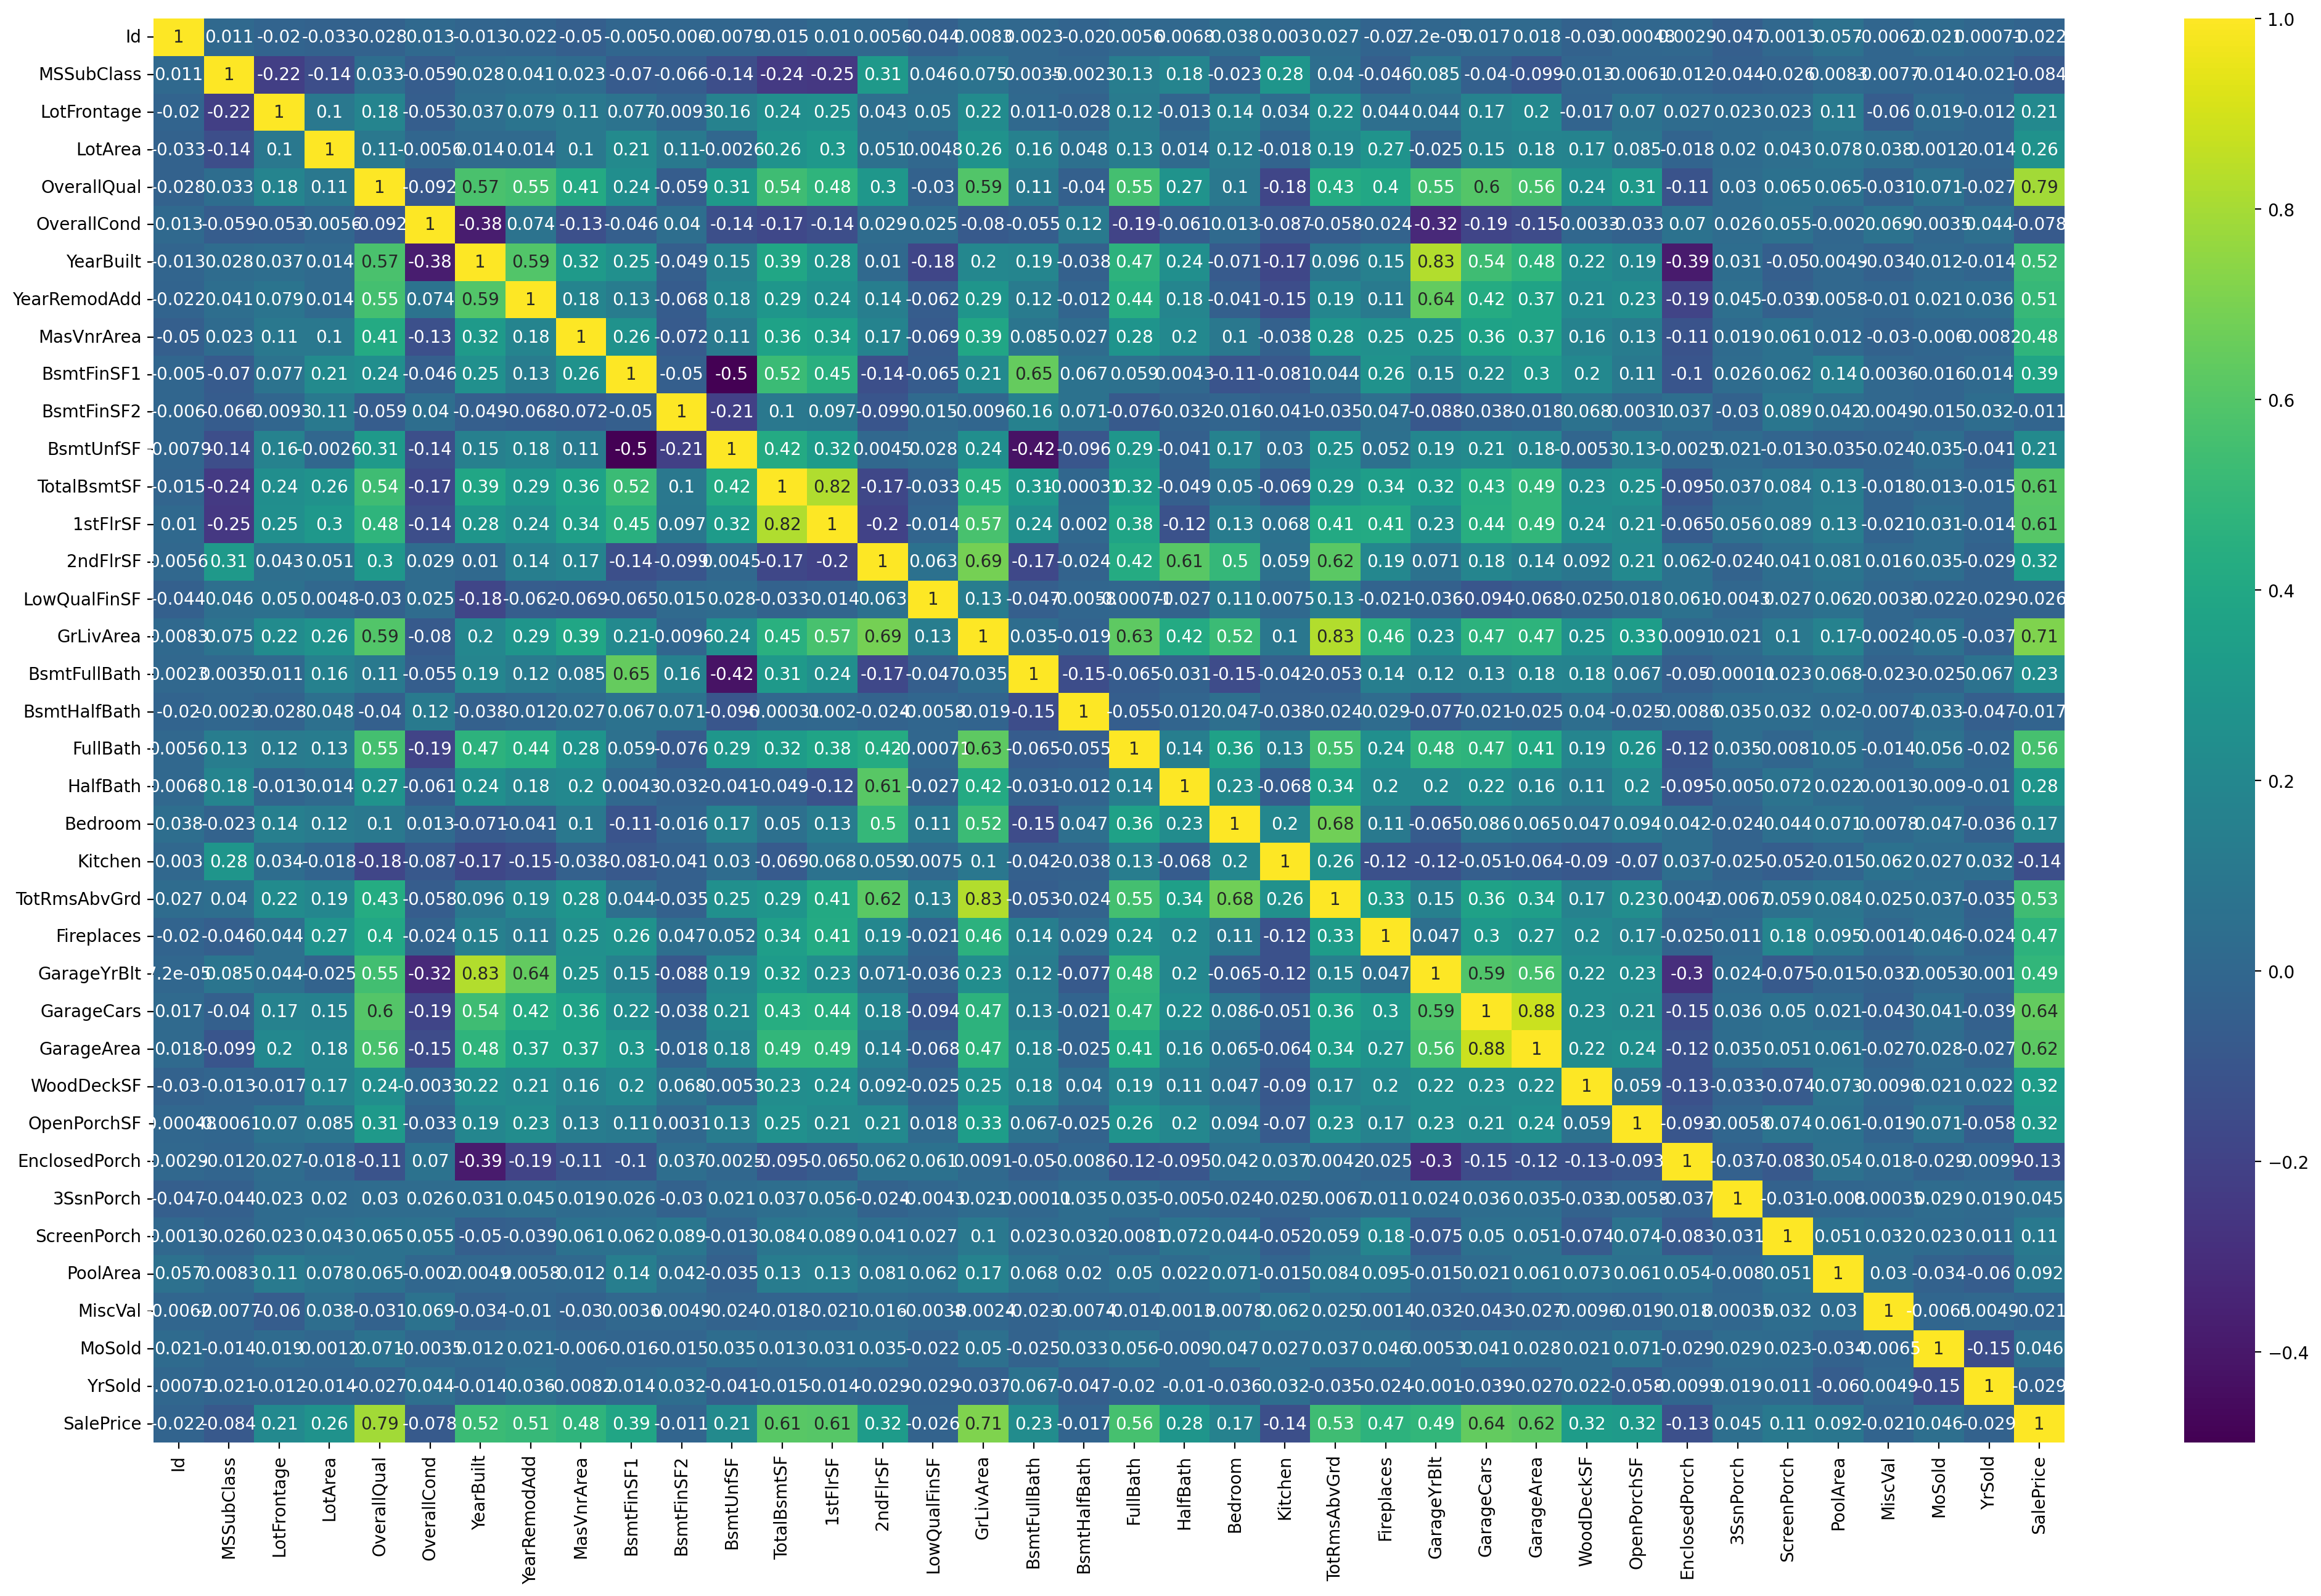

In [118]:
# 3.4 Identify significant variables using a correlation matrix 
plt.figure(figsize=(25,15),dpi=200)
sns.heatmap(housing.corr(),annot=True,cmap="viridis")

#  We can observe here that Sale Price is highly correlated with OverallQual, GrLivArea,GarageCars,GarageArea,TotalBsmntSF,1stFlrSF etc. 


In [123]:
# 3.5 Pair plot for distribution and density

sns.pairplot(housing,corner=True,diag_kind="kde")

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

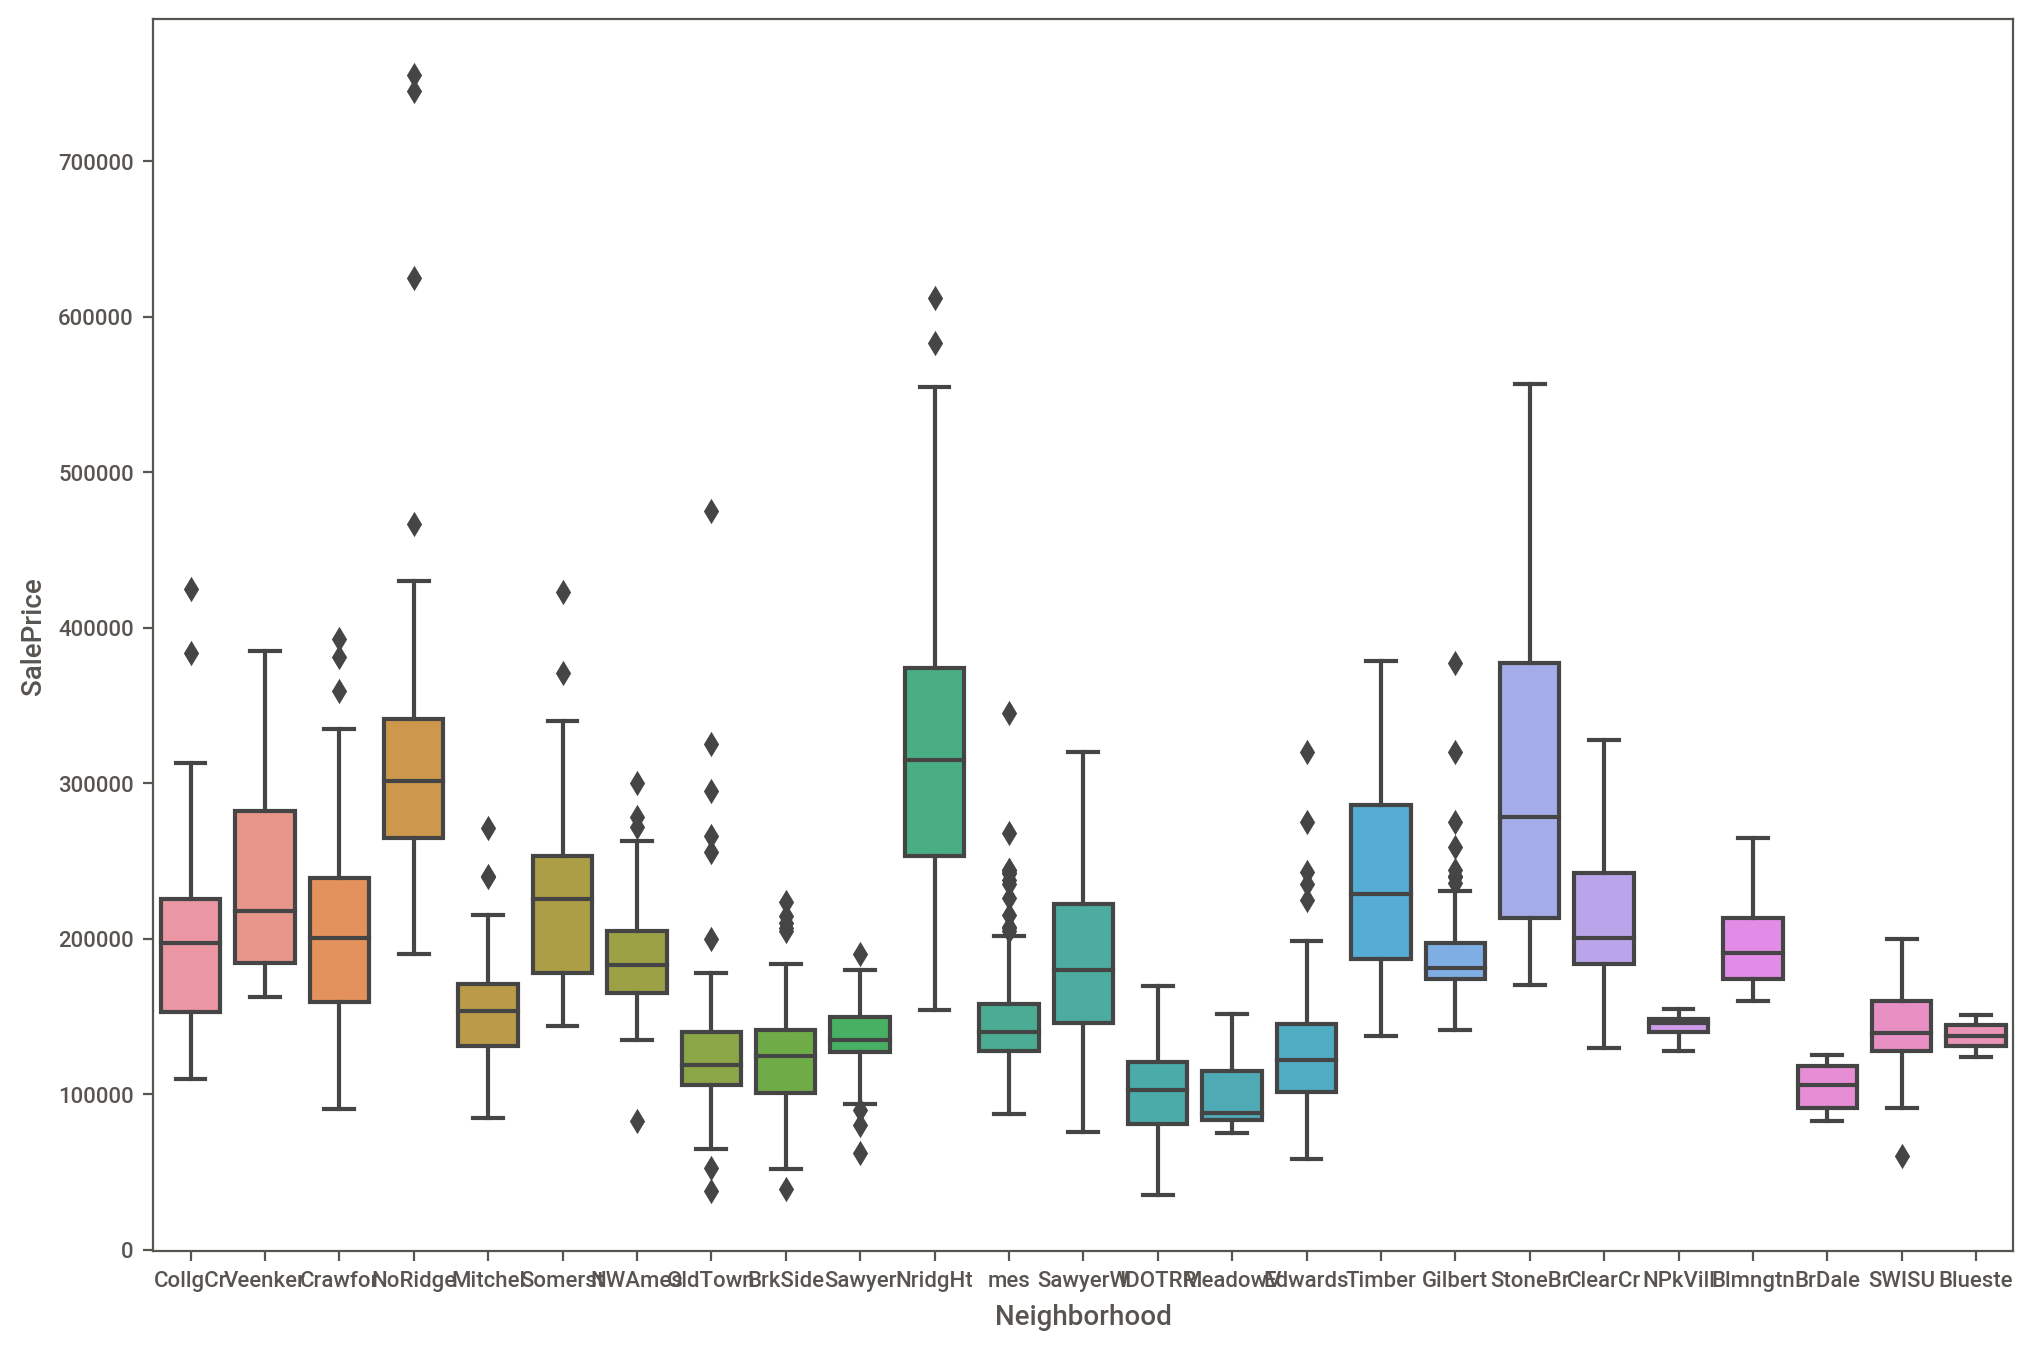

In [128]:
# 3.3 Identify the skewness and distribution 

plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x="Neighborhood",y="SalePrice",data=housing)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

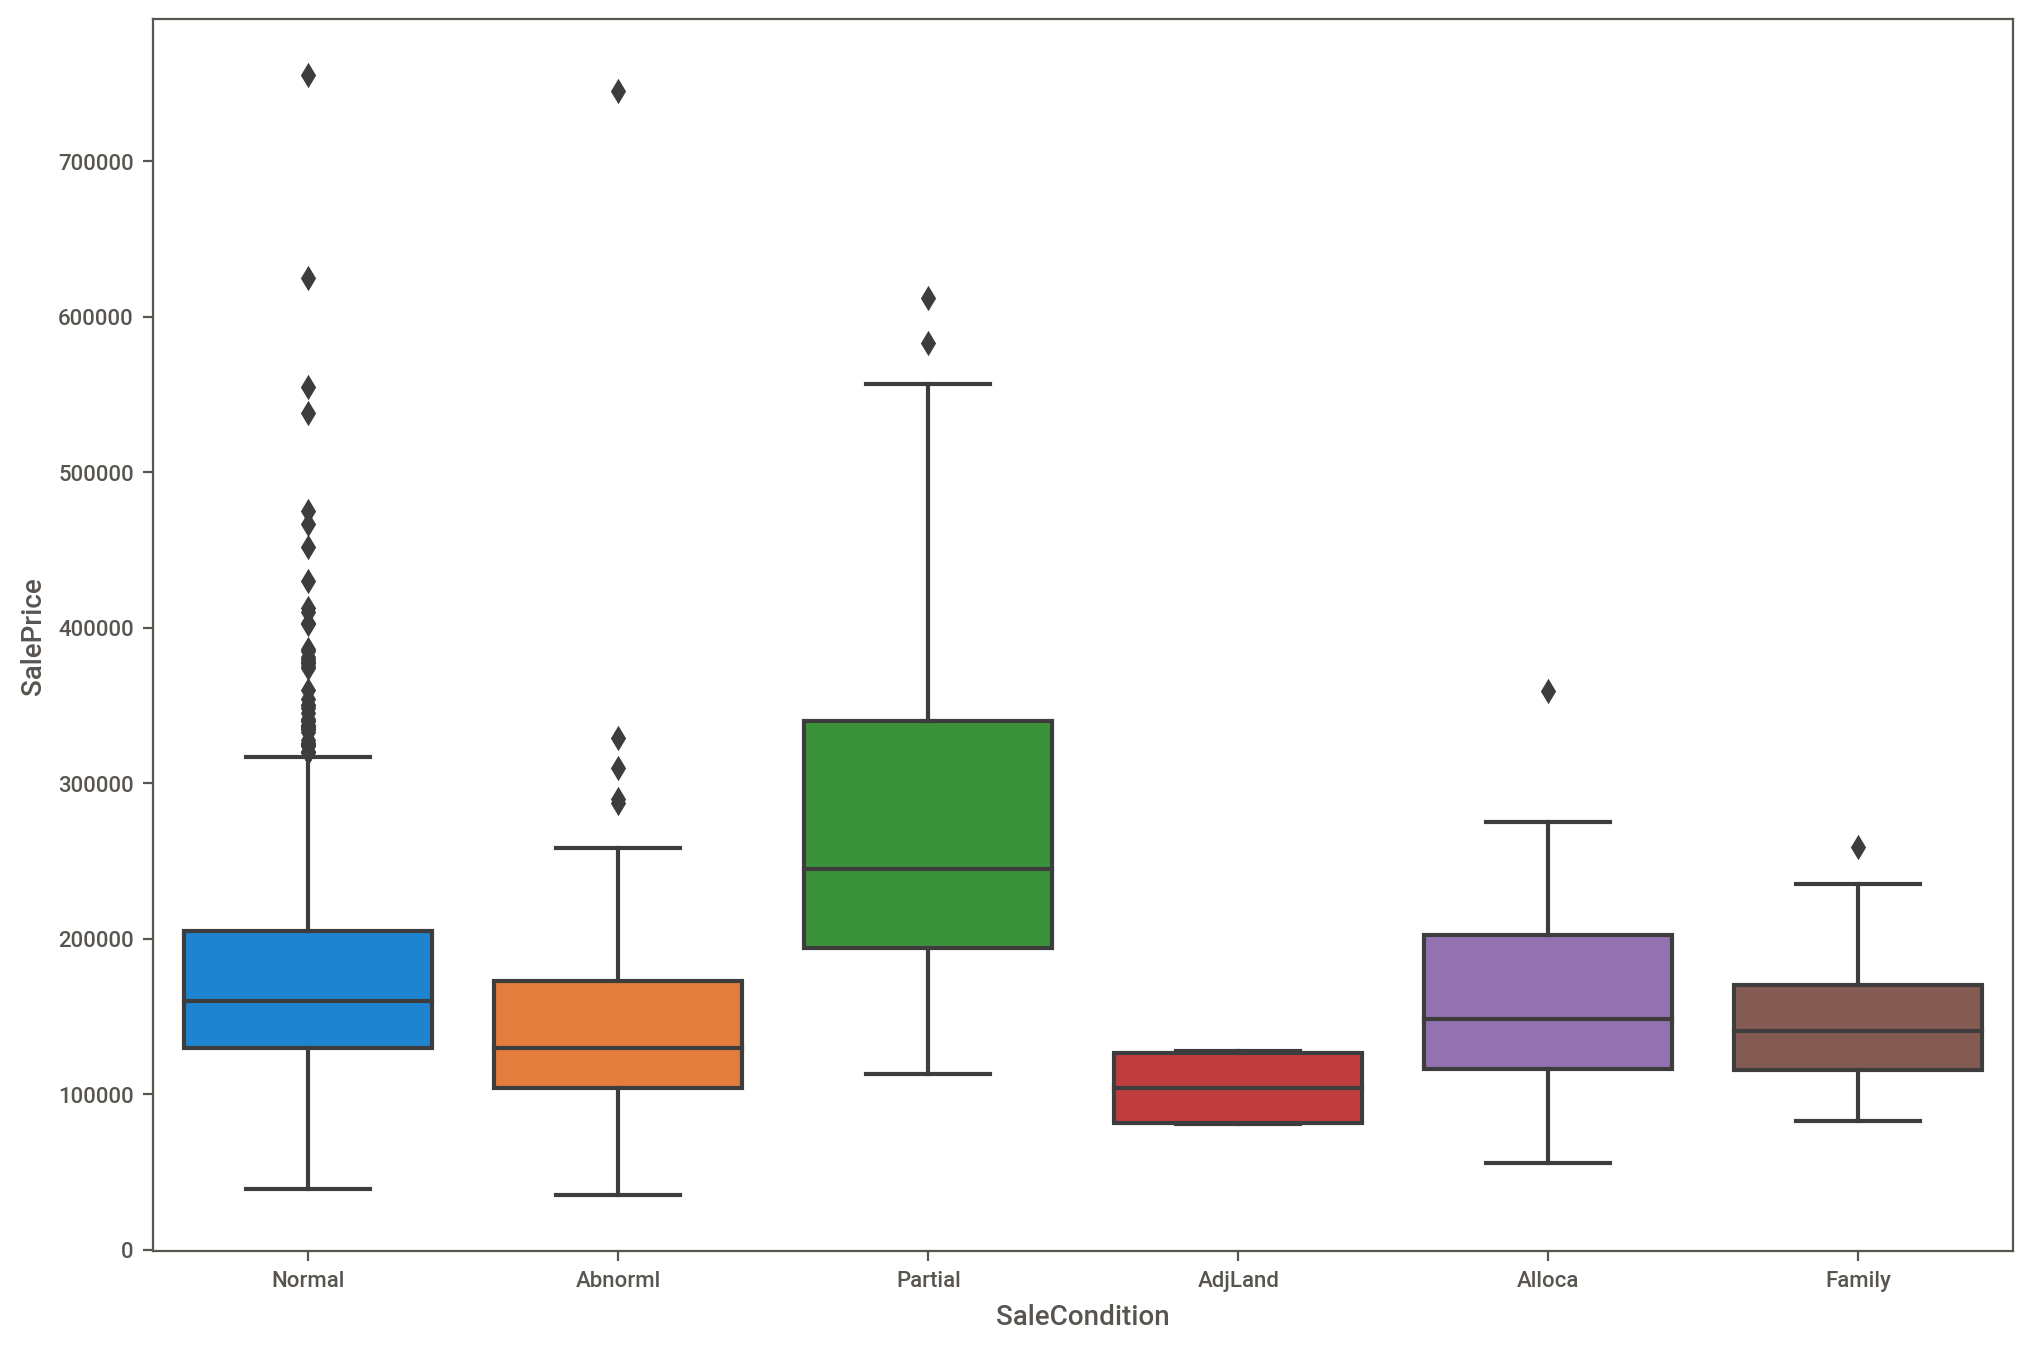

In [134]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x="SaleCondition",y="SalePrice",data=housing)


<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

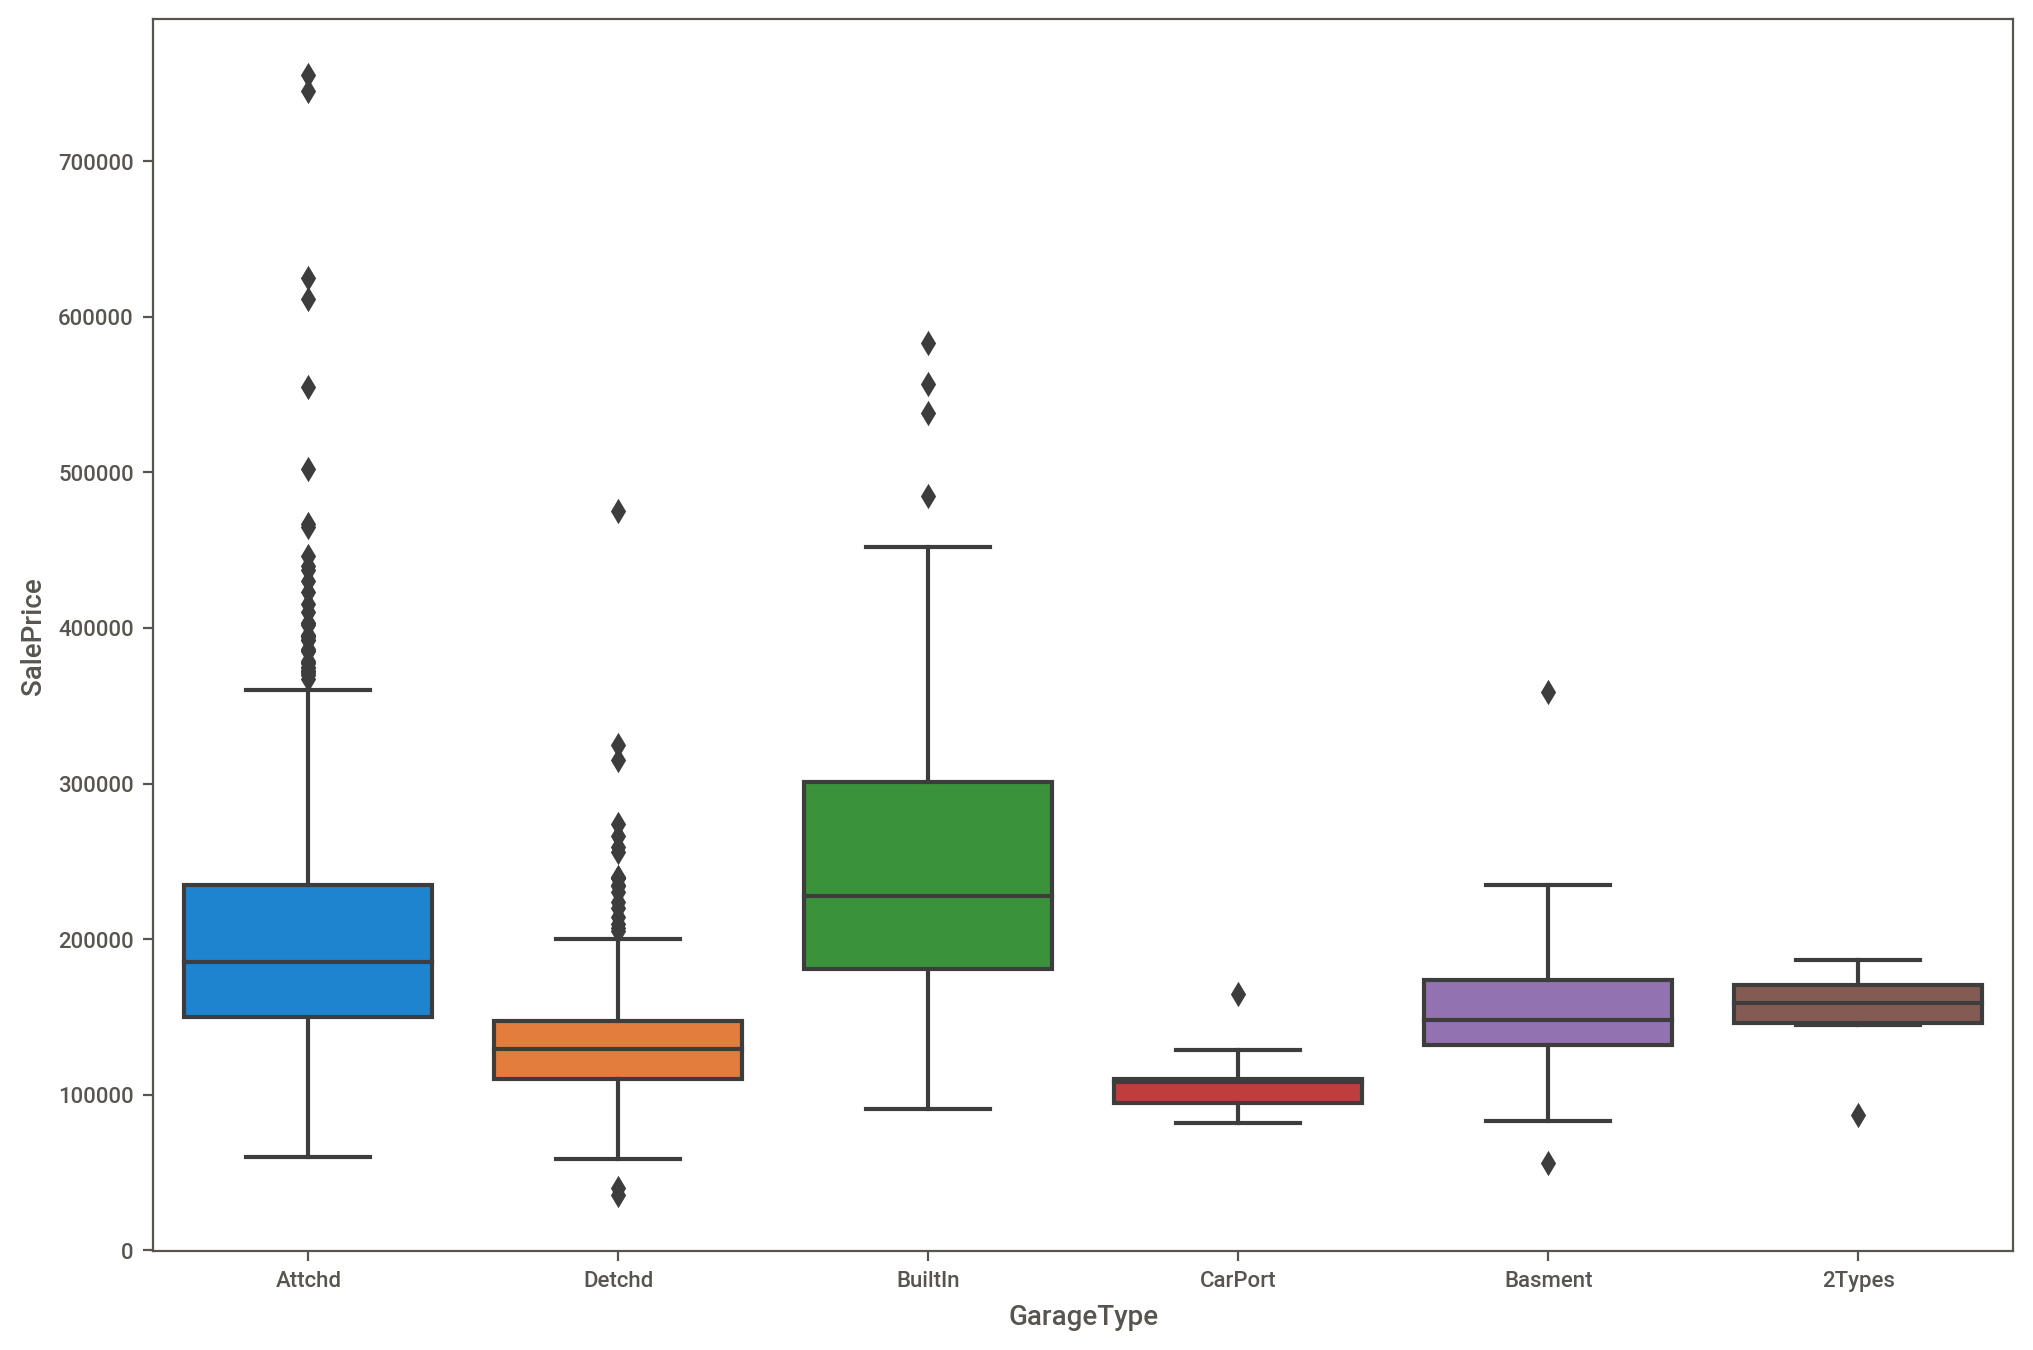

In [135]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x="GarageType",y="SalePrice",data=housing)

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

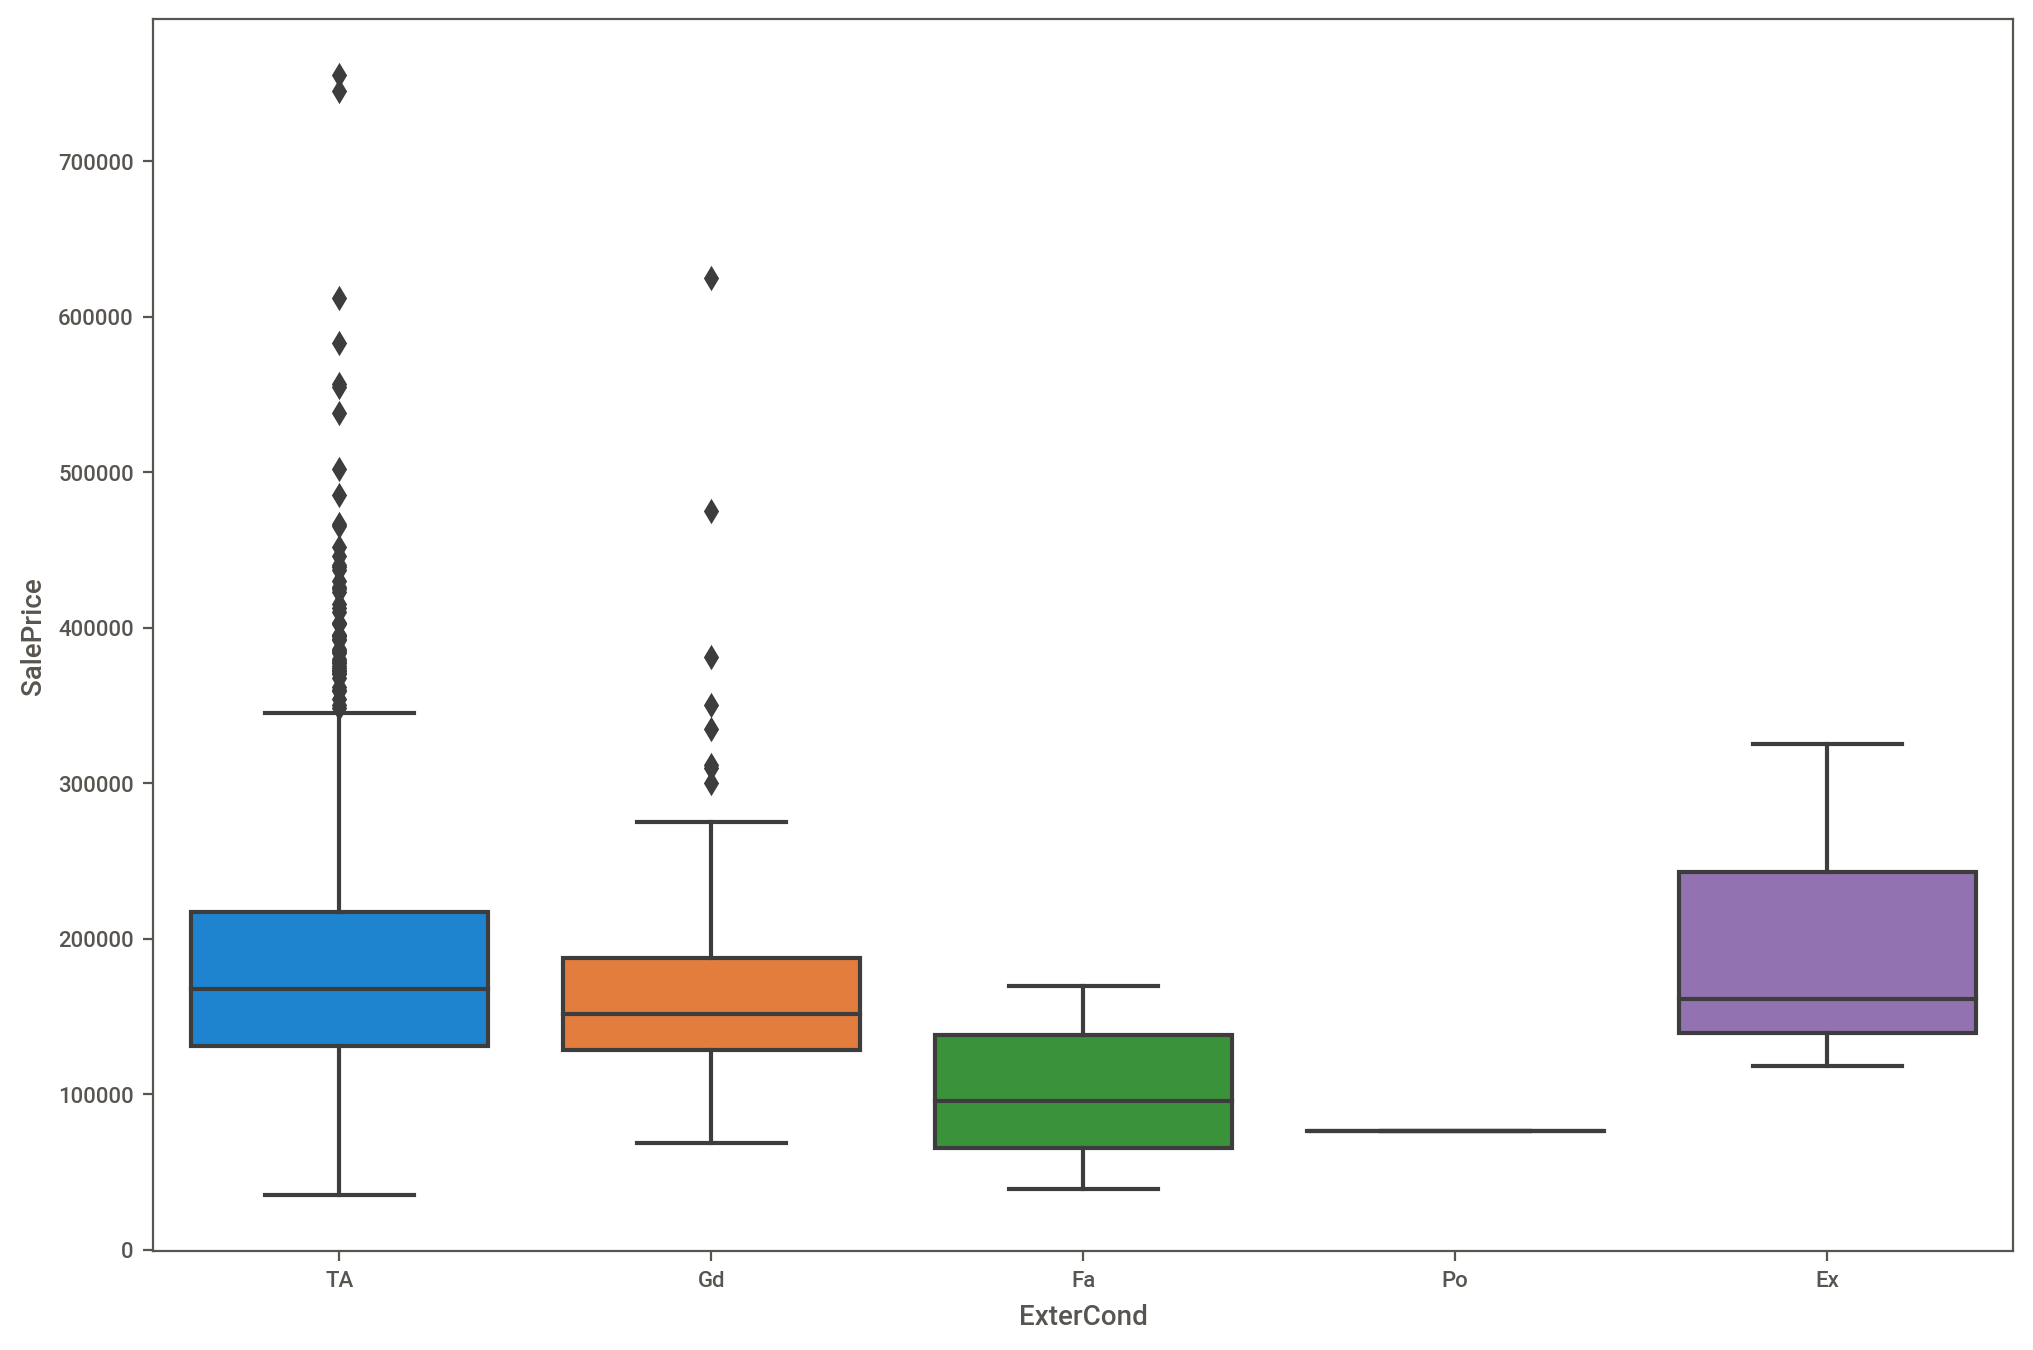

In [136]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x="ExterCond",y="SalePrice",data=housing)

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

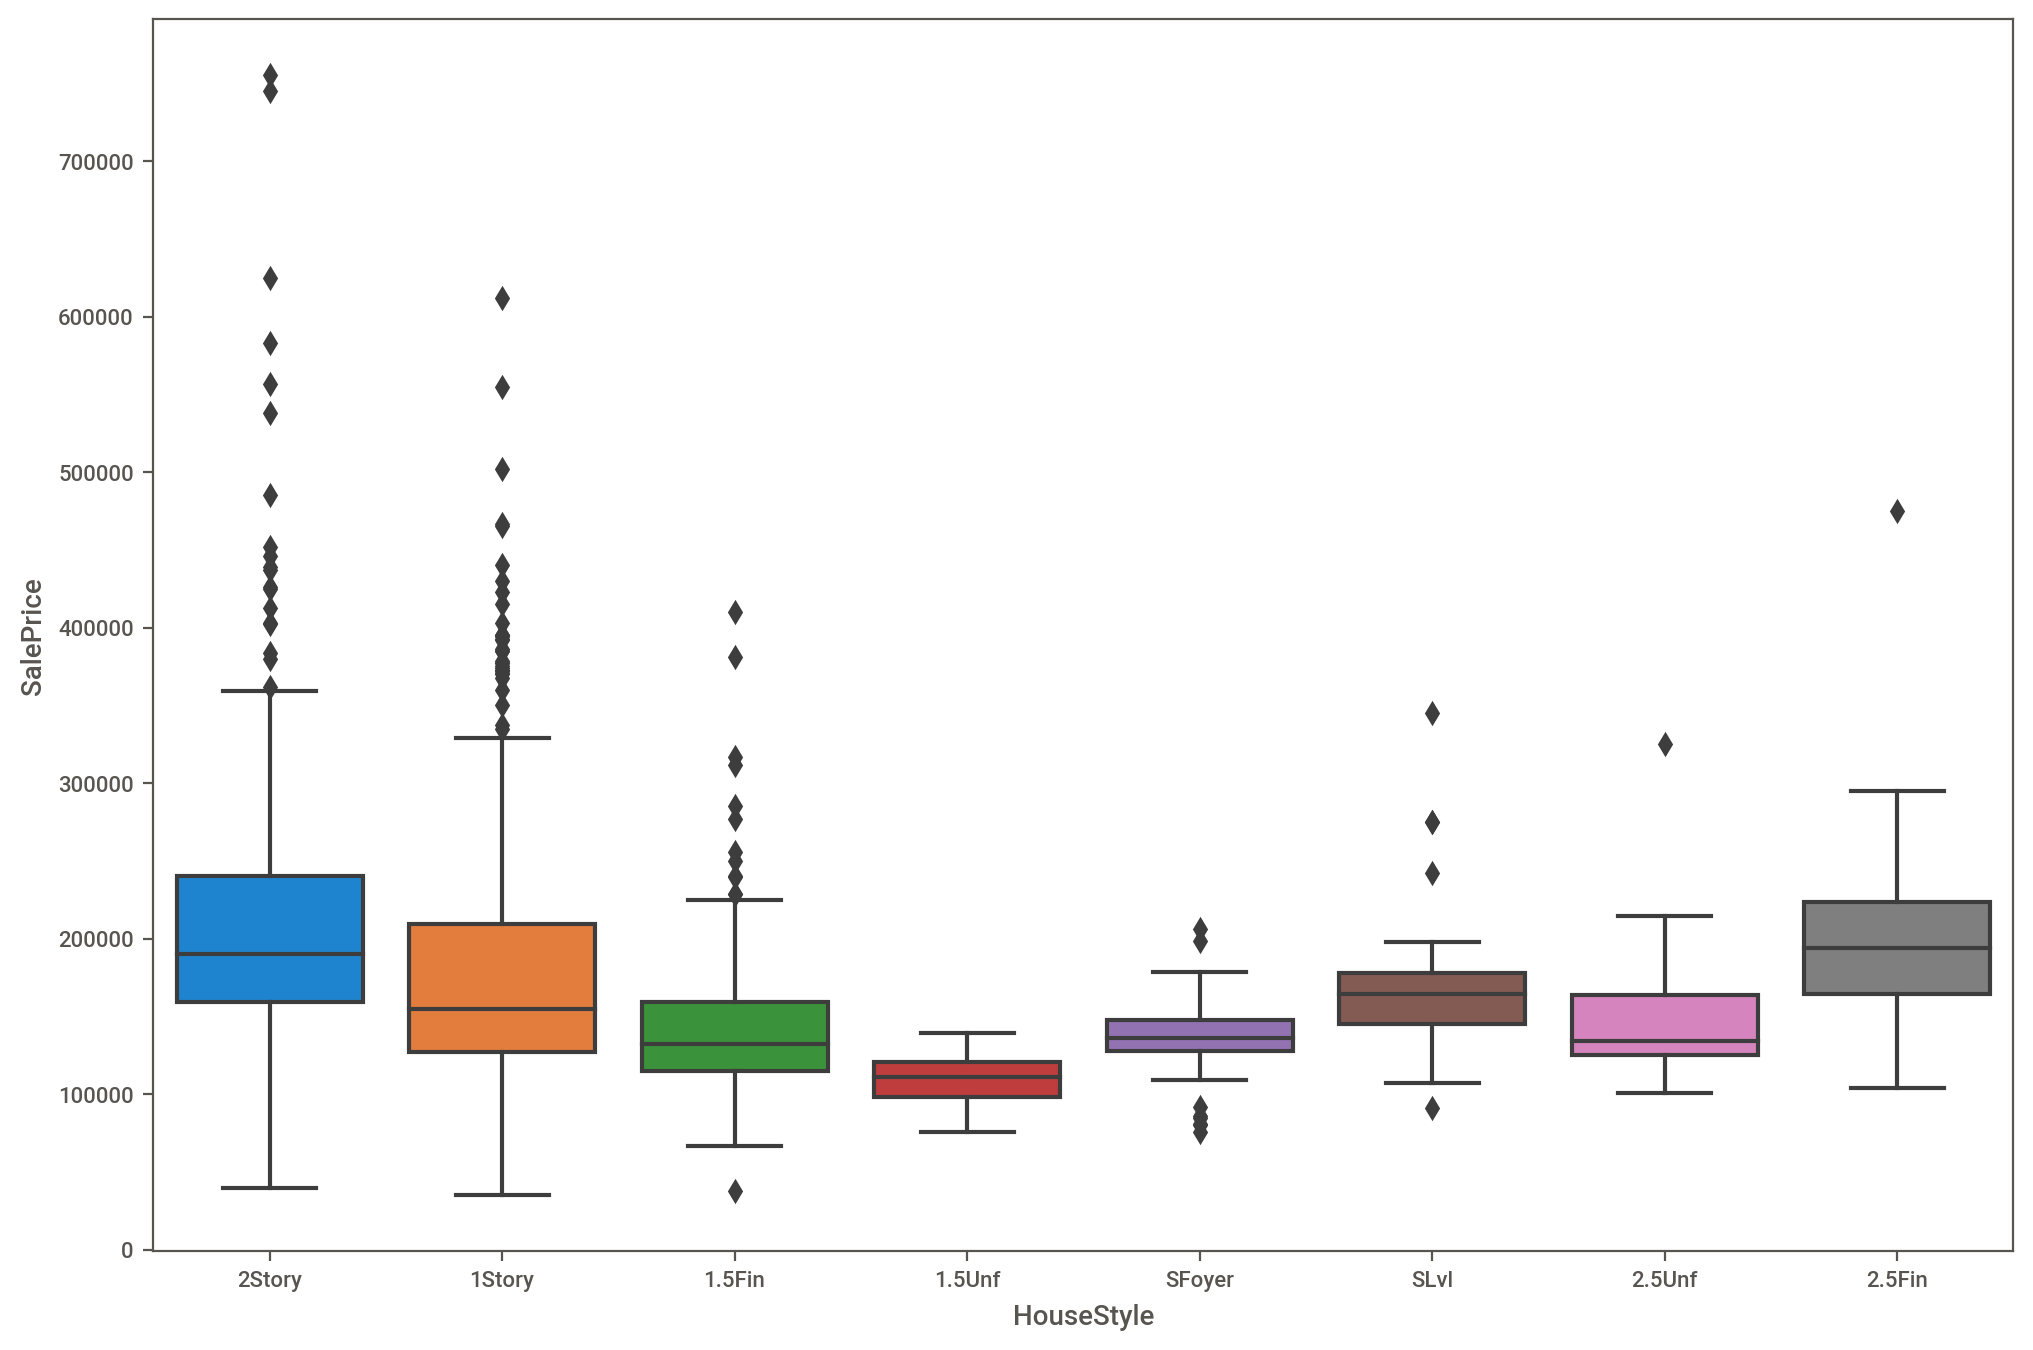

In [137]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x="HouseStyle",y="SalePrice",data=housing)

In [145]:
# Observing different box plots between Sale Price and all Categorical Variables to observe the skewness and distribution of data

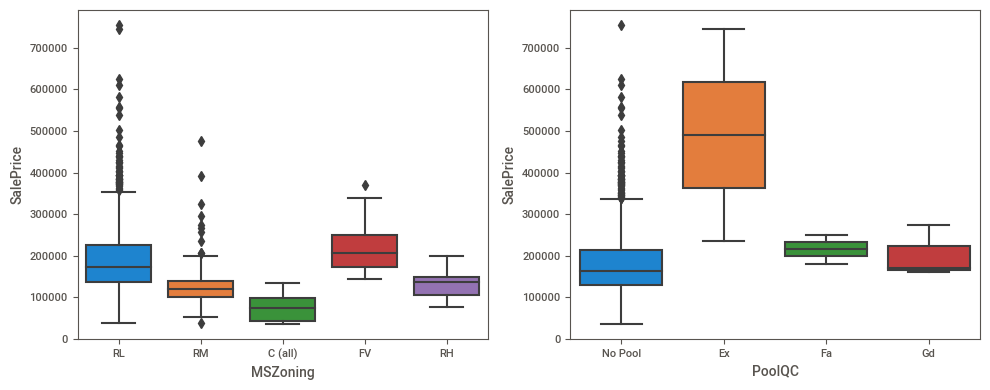

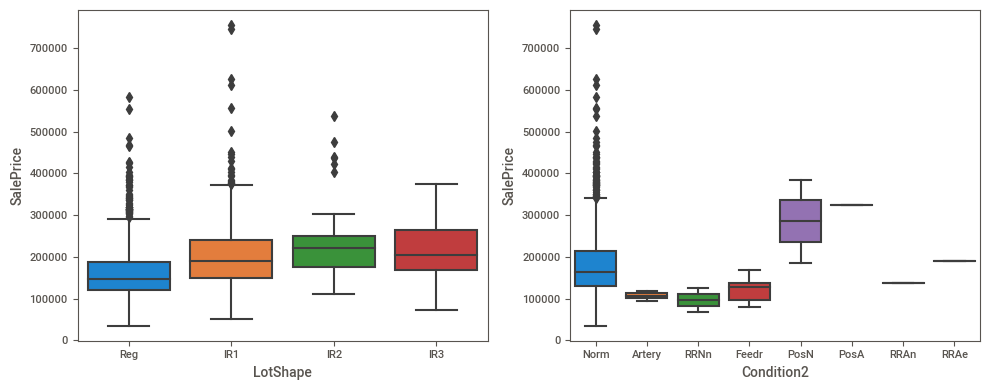

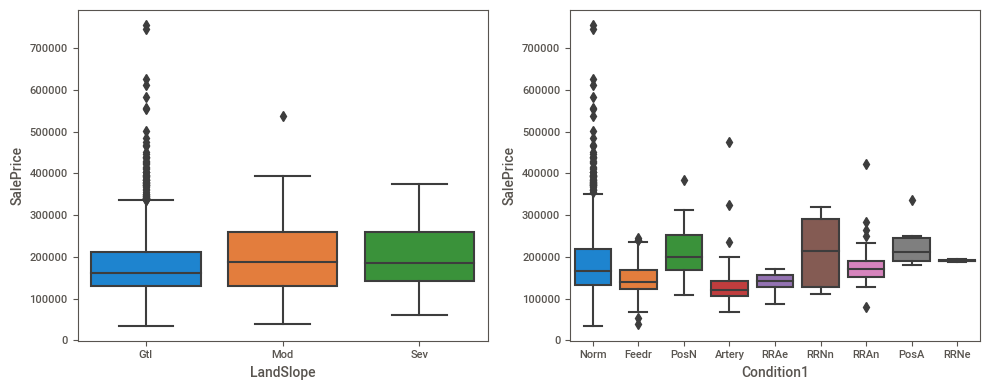

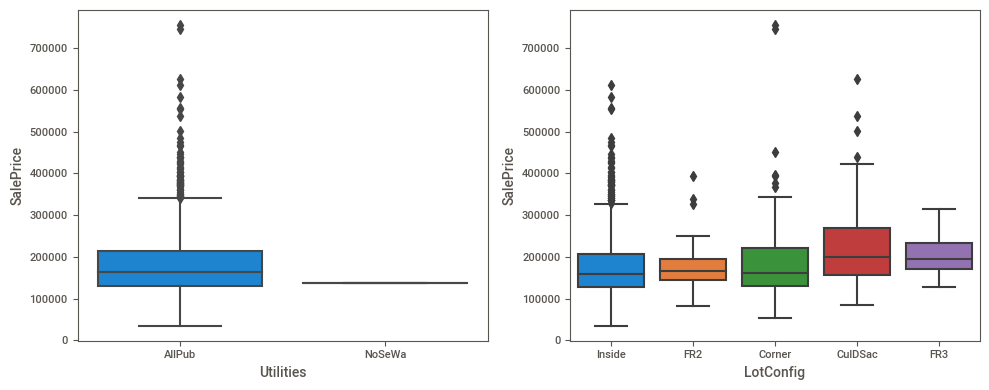

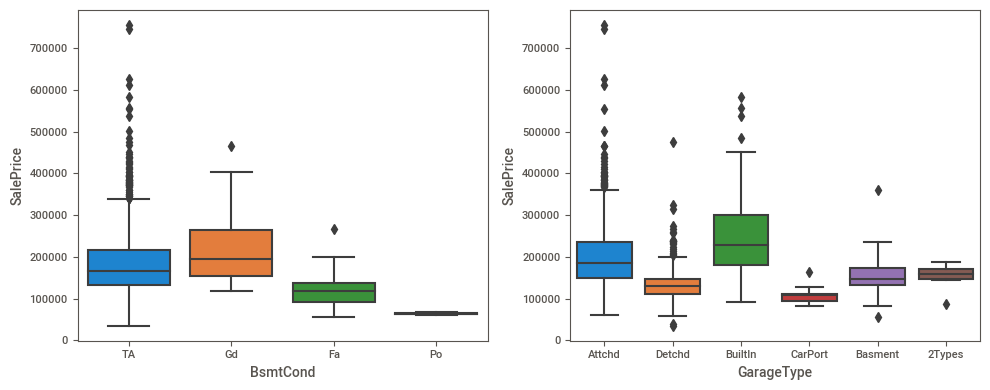

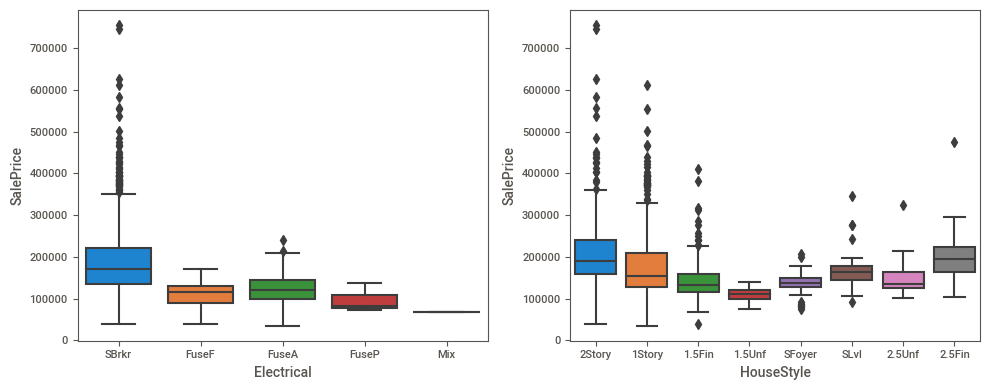

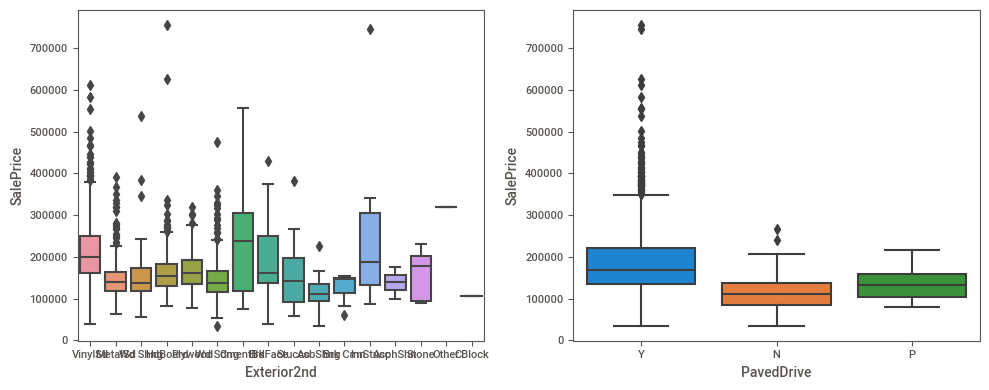

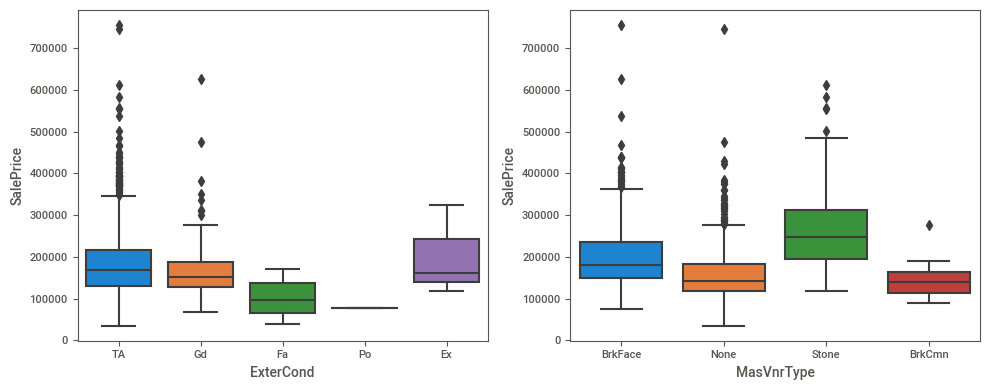

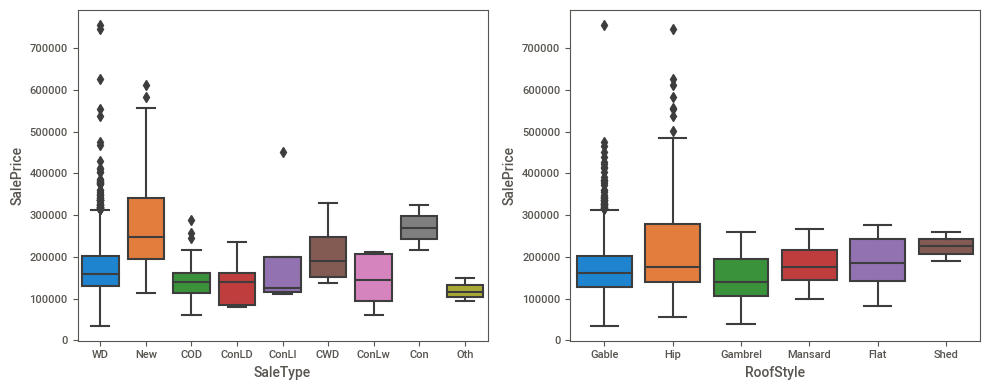

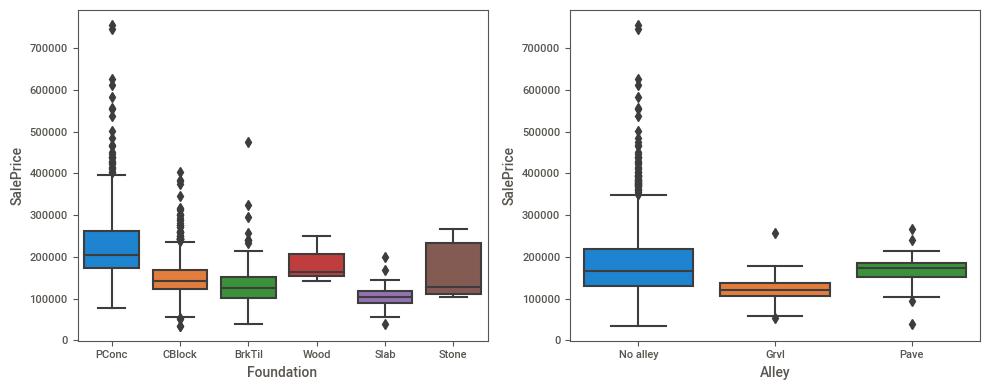

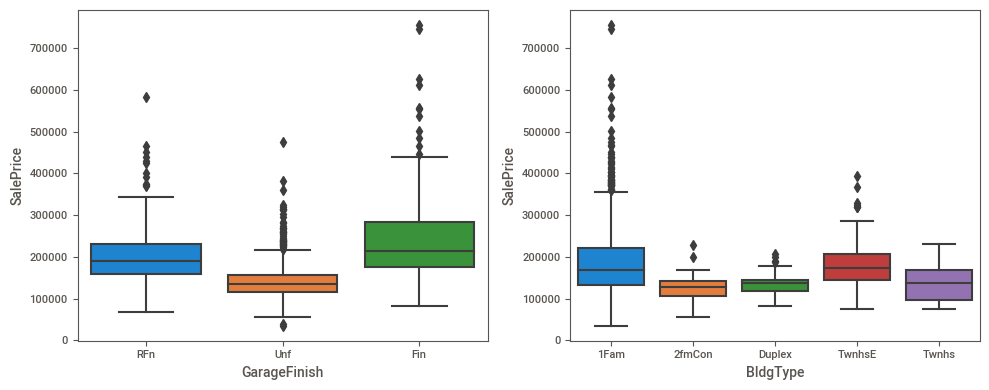

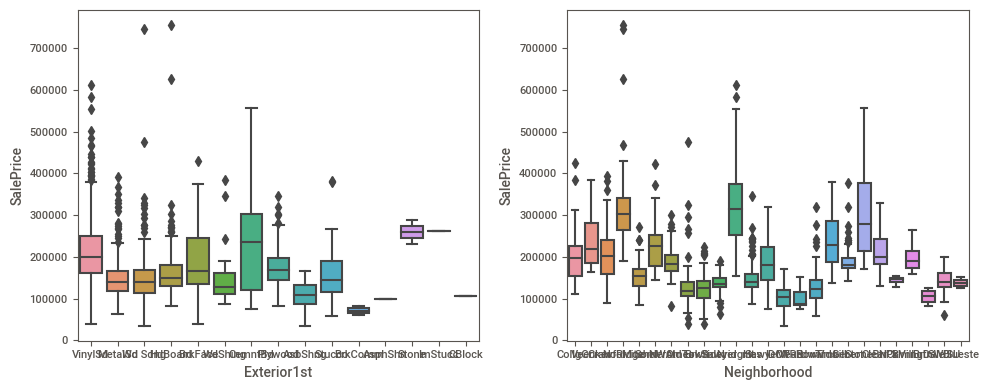

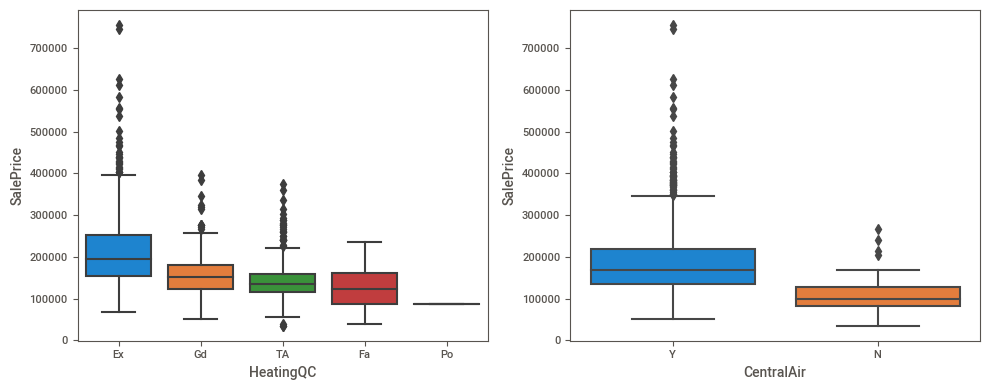

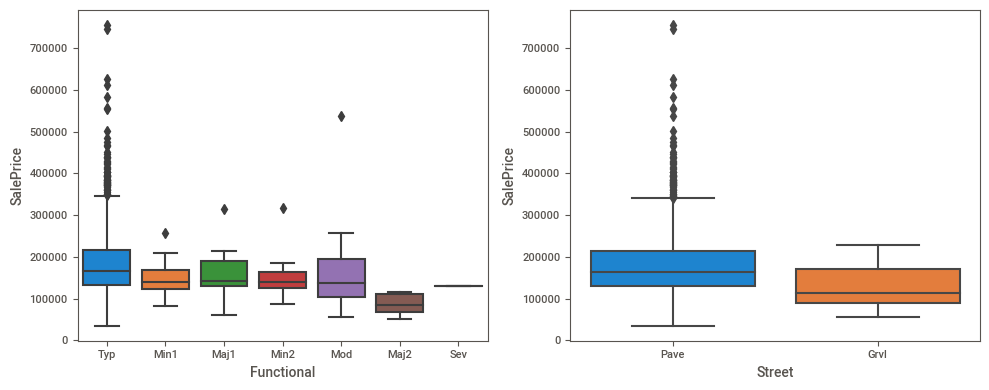

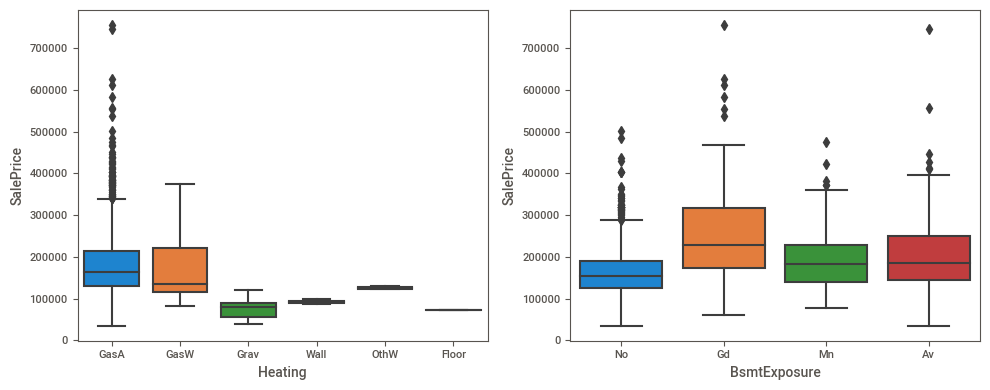

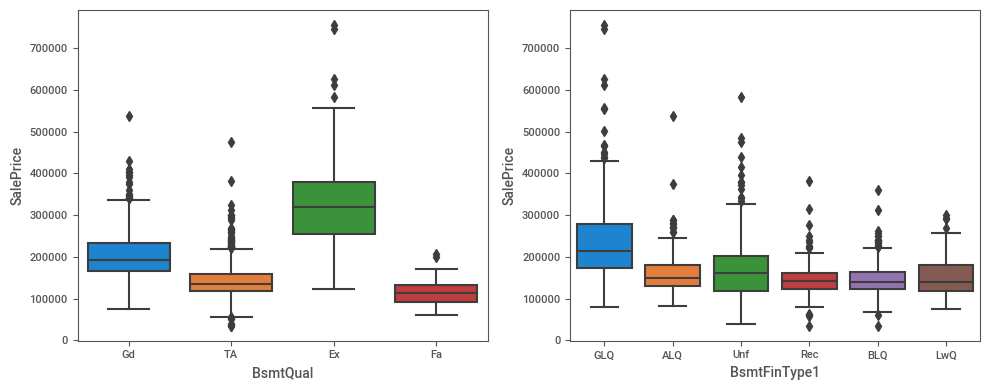

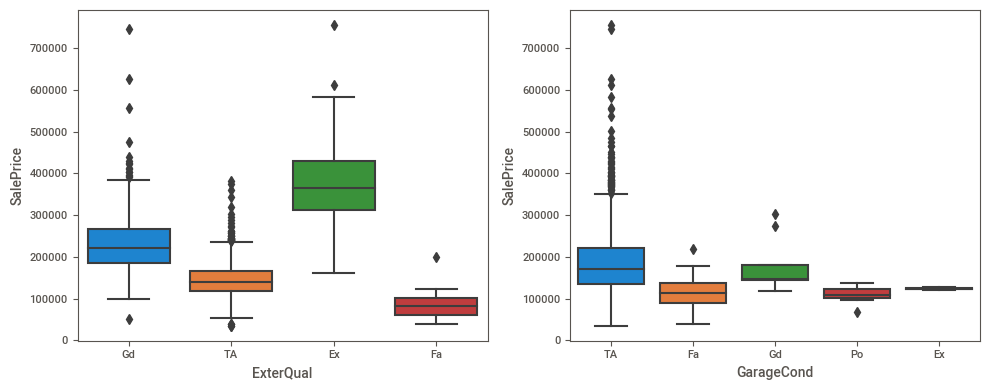

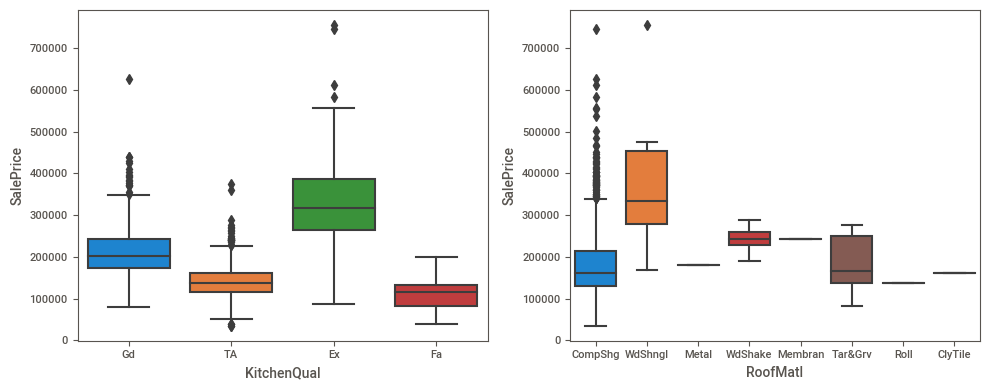

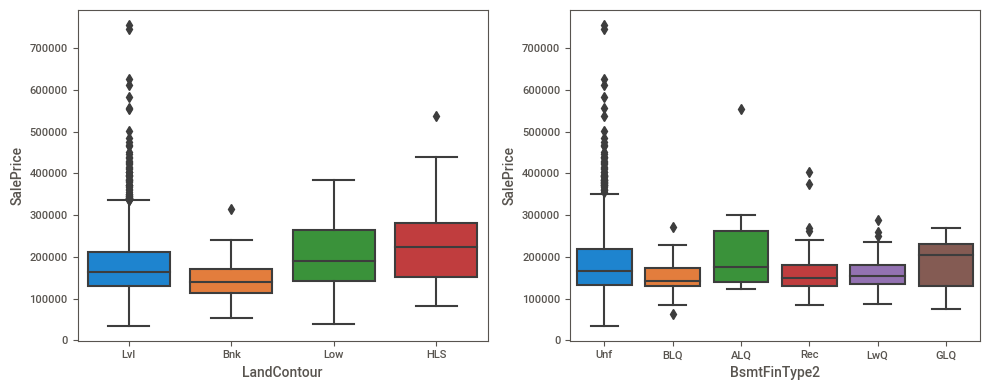

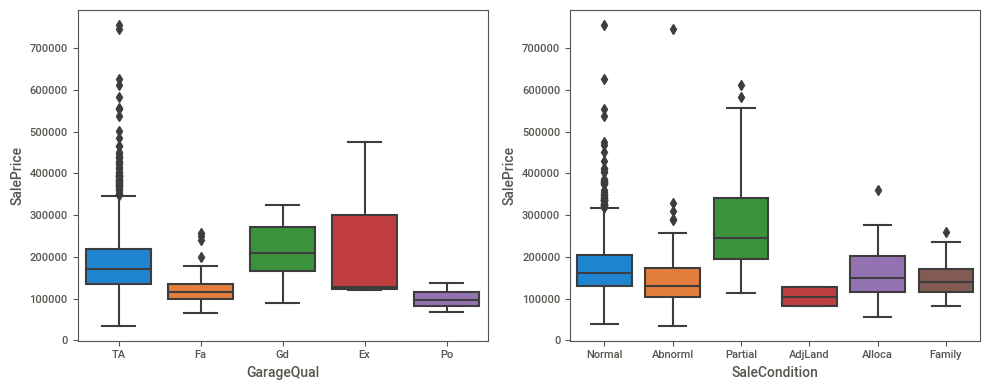

In [144]:
for i in range(0,len(categorical_var),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(x=categorical_var[i],y="SalePrice",data = housing)
    plt.subplot(122)
    sns.boxplot(x=categorical_var[i+1],y="SalePrice",data = housing)
    plt.tight_layout()
    plt.show()

In [129]:
categorical_var

['MSZoning',
 'PoolQC',
 'MiscFeature',
 'LotShape',
 'Condition2',
 'LandSlope',
 'Condition1',
 'Utilities',
 'LotConfig',
 'BsmtCond',
 'GarageType',
 'Electrical',
 'HouseStyle',
 'Exterior2nd',
 'PavedDrive',
 'ExterCond',
 'MasVnrType',
 'SaleType',
 'RoofStyle',
 'Foundation',
 'Alley',
 'GarageFinish',
 'BldgType',
 'Exterior1st',
 'FireplaceQu',
 'Neighborhood',
 'HeatingQC',
 'CentralAir',
 'Functional',
 'Street',
 'Heating',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'ExterQual',
 'GarageCond',
 'KitchenQual',
 'RoofMatl',
 'Fence',
 'LandContour',
 'BsmtFinType2',
 'GarageQual',
 'SaleCondition']